# imports 

In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
import seaborn as sns
from scipy import signal,ndimage,linalg
import scipy.io
from glob import glob
import os
import gc

# Data import 

In [2]:
filepaths=glob ("Multichannel_Seismocardiography_Data/data/*.mat")
print (filepaths)

['Multichannel_Seismocardiography_Data/data\\sub1.mat', 'Multichannel_Seismocardiography_Data/data\\sub10.mat', 'Multichannel_Seismocardiography_Data/data\\sub11.mat', 'Multichannel_Seismocardiography_Data/data\\sub12.mat', 'Multichannel_Seismocardiography_Data/data\\sub13.mat', 'Multichannel_Seismocardiography_Data/data\\sub2.mat', 'Multichannel_Seismocardiography_Data/data\\sub3.mat', 'Multichannel_Seismocardiography_Data/data\\sub4.mat', 'Multichannel_Seismocardiography_Data/data\\sub5.mat', 'Multichannel_Seismocardiography_Data/data\\sub6.mat', 'Multichannel_Seismocardiography_Data/data\\sub7.mat', 'Multichannel_Seismocardiography_Data/data\\sub8.mat', 'Multichannel_Seismocardiography_Data/data\\sub9.mat']


In [3]:
key=filepaths[0].split("\\")[1].split(".")[0]
print(key)

sub1


In [20]:
mat=scipy.io.loadmat(filepaths[0])


processed_data = {}

# Iterate through each item in the dictionary
for key, value in mat.items():
    if value.ndim == 1:  # Single array
        processed_data[key] = value
    elif value.ndim == 2 and value.shape[1] == 3:  # Matrix or list of 3 arrays
        # Split into separate columns
        for i, label in enumerate(['x', 'y', 'z']):
            processed_data[f"{key}_{label}"] = value[:,i]

# Convert the processed data into a DataFrame
df = pd.DataFrame(processed_data)

print(df)

        ECG_1_1_x  ECG_1_1_y  ECG_1_1_z  SCG_1_1_x  SCG_1_1_y  SCG_1_1_z  \
0         -111174     -34362     -14620      12182      13766     -33173   
1         -111258     -34407     -14609      17382      22558     -92953   
2         -111332     -34419     -14629      19947      30529    -179258   
3         -111394     -34446     -14658      19692      33696    -232652   
4         -111446     -34373     -14745      17312      32614    -251399   
...           ...        ...        ...        ...        ...        ...   
156774     -18016     -28254     -12610          0          0          0   
156775     -17978     -28200     -12679          0          0          0   
156776     -17949     -28146     -12660          0          0          0   
156777     -17906     -28077     -12636          0          0          0   
156778     -17878     -28042     -12585          0          0          0   

        SCG_1_2_x  SCG_1_2_y  SCG_1_2_z  SCG_1_3_x  ...  SCG_2_5_z  SCG_2_6_x  \
0     

# Data parser loop

In [16]:
for mypath in reversed(filepaths):
    print("LOADING:",mypath)
    key=mypath.split("\\")[1].split(".")[0]
    print("KEY = {0}".format(key))
    processed_data = {}
    mat=scipy.io.loadmat(mypath)
    # Iterate through each item in the dictionary
    for key, value in mat.items():
        if value.ndim == 1:  # Single array
            processed_data[key] = value
        elif value.ndim == 2 and value.shape[1] == 3:  # Matrix or list of 3 arrays
            # Split into separate columns
            for i, label in enumerate(['Y', 'X', 'Z']):
                processed_data[f"{key}_{label}"] = value[:,i]*-1
    
    data_df=pd.DataFrame(processed_data)
    data_df.rename(columns={'ECG_1_1_Y': 'RESP', 'ECG_1_1_X': 'ECG_II',"ECG_1_1_Z" : "ECG_III"}, inplace=True)
    for ecg_k in ["RESP","ECG_II","ECG_III"]:
        data_df[ecg_k]=data_df[ecg_k]*-1
    display(data_df)
    print (data_df.head())
    print (data_df.shape)
    print("")
    print ("saving formatted csv: ",key)
    data_df.to_csv("Formatted_Multichannel_SCG_Data//{0}".format(key),index=False)
    print("")
    print("")
    print("") 

LOADING: Multichannel_Seismocardiography_Data/data\sub9.mat
KEY = sub9


,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-643336,87288,176454,-31142,-15439,31012,-8986,-11559,-9971,-10372,...,-7832,-4316,-9516,-10902,-15943,-24409,26780,-18543,-16530,27983
1,-643347,11170,-21169,-61363,-25679,81945,-18882,-16903,22143,-12282,...,14419,-3585,-27976,13640,-29455,-49009,74013,-37192,-32389,76657
2,-643322,-31667,-57699,-97274,-35250,154083,-32349,-20088,86822,-9881,...,64497,525,-58138,70769,-44562,-80108,149479,-60775,-51766,156454
3,-643294,-15478,-8545,-116169,-39087,198549,-46039,-20563,153041,-6843,...,116923,2073,-86905,133357,-52975,-98986,202439,-75668,-63726,214742
4,-643294,13279,-3479,-118558,-37806,214028,-58440,-18895,212161,-3923,...,164391,380,-110816,192816,-53332,-102216,222325,-78310,-65446,236726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90750,-47936,-76907,-87376,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90751,-48011,-48826,-59631,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90752,-48040,-82203,-144074,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90753,-48078,-64714,-40246,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -643336   87288   176454     -31142     -15439      31012      -8986   
1 -643347   11170   -21169     -61363     -25679      81945     -18882   
2 -643322  -31667   -57699     -97274     -35250     154083     -32349   
3 -643294  -15478    -8545    -116169     -39087     198549     -46039   
4 -643294   13279    -3479    -118558     -37806     214028     -58440   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -11559      -9971     -10372  ...      -7832      -4316      -9516   
1     -16903      22143     -12282  ...      14419      -3585     -27976   
2     -20088      86822      -9881  ...      64497        525     -58138   
3     -20563     153041      -6843  ...     116923       2073     -86905   
4     -18895     212161      -3923  ...     164391        380    -110816   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0     -10902     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-42011,130710,143079,-11446,-3359,-9421,-8611,-14740,-14803,-10929,...,-8175,-3565,-13464,-14399,-9601,-27540,21345,-4563,-9265,1871
1,-42037,811902,1011804,-26788,-1616,24482,-13434,-11435,17433,-13199,...,12143,-1552,-34569,7212,-17871,-61560,62194,-16265,-24734,32108
2,-42089,-377797,-347513,-47786,3154,88995,-17814,2792,84947,-10991,...,57483,4886,-67598,62509,-27177,-109826,129997,-37009,-49529,93456
3,-42212,-1143534,-1476047,-65243,8447,154097,-22679,18653,154218,-9088,...,105438,8754,-99024,124304,-32425,-141751,179242,-56770,-71946,152426
4,-42283,-223604,-401217,-77832,13431,211169,-27582,33614,216071,-8151,...,149519,8880,-125053,183747,-32570,-150240,198764,-72695,-88821,199661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91169,-7267,-124000,-187136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91170,-7241,-118373,-170357,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91171,-7177,211876,251151,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91172,-7147,-201658,-239727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    RESP   ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -42011   130710   143079     -11446      -3359      -9421      -8611   
1 -42037   811902  1011804     -26788      -1616      24482     -13434   
2 -42089  -377797  -347513     -47786       3154      88995     -17814   
3 -42212 -1143534 -1476047     -65243       8447     154097     -22679   
4 -42283  -223604  -401217     -77832      13431     211169     -27582   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -14740     -14803     -10929  ...      -8175      -3565     -13464   
1     -11435      17433     -13199  ...      12143      -1552     -34569   
2       2792      84947     -10991  ...      57483       4886     -67598   
3      18653     154218      -9088  ...     105438       8754     -99024   
4      33614     216071      -8151  ...     149519       8880    -125053   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0     -14399     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-512552,-20970,30088,-12625,-9964,-7659,-16248,-10193,36474,-7843,...,-7815,-3649,-31864,26953,-13479,-25782,26522,-8248,-9319,-558
1,-512609,-23230,30534,-28737,-14797,24626,-25243,-12457,96246,-6444,...,16654,1209,-65180,73941,-23323,-52024,73707,-20433,-22038,28028
2,-512691,4011,30210,-50778,-18193,86894,-32388,-11185,179151,793,...,71125,13062,-107751,146415,-32866,-85401,149273,-39607,-41361,90862
3,-512771,4296,30217,-69244,-19878,150173,-34732,-8602,228688,6833,...,127760,22036,-132966,195204,-37466,-105763,202304,-57766,-58780,153335
4,-512864,-40067,31000,-82662,-20117,206212,-33110,-5448,245007,10632,...,178660,26460,-137760,213251,-36499,-109410,222195,-72217,-71552,203906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93232,7739,-12226,26134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93233,7484,5040,26026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93234,7222,-626,26398,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93235,6953,-33978,27157,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -512552  -20970    30088     -12625      -9964      -7659     -16248   
1 -512609  -23230    30534     -28737     -14797      24626     -25243   
2 -512691    4011    30210     -50778     -18193      86894     -32388   
3 -512771    4296    30217     -69244     -19878     150173     -34732   
4 -512864  -40067    31000     -82662     -20117     206212     -33110   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -10193      36474      -7843  ...      -7815      -3649     -31864   
1     -12457      96246      -6444  ...      16654       1209     -65180   
2     -11185     179151        793  ...      71125      13062    -107751   
3      -8602     228688       6833  ...     127760      22036    -132966   
4      -5448     245007      10632  ...     178660      26460    -137760   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      26953     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-64639,-23506,-26046,1651,-4106,42796,3852,-6157,38379,-1001,...,3892,17119,-21741,25304,-4837,-12381,-5306,-4657,-12265,34802
1,-64626,-23695,-26079,13531,-1592,104778,17657,-4593,93272,17750,...,33107,46542,-41541,65696,4031,-26352,19922,-1797,-20318,87369
2,-64637,-23836,-26526,32783,4690,188279,39536,1419,168349,52997,...,89369,92409,-64967,127477,26931,-45537,78513,8054,-26955,168471
3,-64632,-23930,-27251,45291,9446,237268,53383,6656,213444,85114,...,141139,123036,-78444,169588,49428,-61172,141929,16364,-29654,225127
4,-64621,-23896,-27984,50648,12255,252221,58546,10441,227552,110291,...,180626,133026,-80098,184925,67198,-70905,200491,20860,-28093,244635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151832,-50581,-17265,-24971,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151833,-50613,-17437,-25343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151834,-50675,-17558,-26140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151835,-50719,-17539,-27034,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -64639  -23506   -26046       1651      -4106      42796       3852   
1 -64626  -23695   -26079      13531      -1592     104778      17657   
2 -64637  -23836   -26526      32783       4690     188279      39536   
3 -64632  -23930   -27251      45291       9446     237268      53383   
4 -64621  -23896   -27984      50648      12255     252221      58546   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0      -6157      38379      -1001  ...       3892      17119     -21741   
1      -4593      93272      17750  ...      33107      46542     -41541   
2       1419     168349      52997  ...      89369      92409     -64967   
3       6656     213444      85114  ...     141139     123036     -78444   
4      10441     227552     110291  ...     180626     133026     -80098   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      25304      -4837

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-1570,-151042,5689,-11262,-9047,347,-8497,-10868,-6870,5344,...,3470,13437,-34857,20384,3605,-30146,28749,-4745,-26287,29773
1,-1779,-151077,5711,-10805,-4684,40708,-1519,-8714,24127,24458,...,30365,38216,-71125,54317,16951,-61260,75013,-2465,-52957,76119
2,-1998,-151085,5757,-3614,8359,113522,16282,1840,86271,56227,...,81083,77557,-117649,106864,41338,-101176,146955,6656,-86894,149319
3,-2174,-151042,5781,5523,22496,179418,33389,14482,148788,77259,...,126861,104042,-145787,142952,59061,-125774,196696,14685,-108428,202047
4,-2346,-150936,5767,14971,35592,231064,47483,27130,203671,85385,...,161282,112946,-151255,156452,66328,-130592,214381,19239,-112404,221090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151669,32575,-126674,-25807,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151670,32336,-126826,-25760,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151671,32119,-126784,-25727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151672,31874,-126784,-25684,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


   RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -1570 -151042     5689     -11262      -9047        347      -8497   
1 -1779 -151077     5711     -10805      -4684      40708      -1519   
2 -1998 -151085     5757      -3614       8359     113522      16282   
3 -2174 -151042     5781       5523      22496     179418      33389   
4 -2346 -150936     5767      14971      35592     231064      47483   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -10868      -6870       5344  ...       3470      13437     -34857   
1      -8714      24127      24458  ...      30365      38216     -71125   
2       1840      86271      56227  ...      81083      77557    -117649   
3      14482     148788      77259  ...     126861     104042    -145787   
4      27130     203671      85385  ...     161282     112946    -151255   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      20384       3605     -

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-114036,-50309,3669,-10914,-22027,38042,343,-16374,28349,4079,...,31042,-690,-8202,-8291,-1735,-20318,33116,-8085,-7133,-4537
1,-114102,-50296,3613,-13309,-39615,99442,12964,-28021,80312,21206,...,78797,20566,-17244,10199,4682,-39461,85446,-11703,-13822,23014
2,-114169,-50317,3572,-12137,-58194,182646,35220,-39527,157140,50079,...,149845,64182,-29664,54609,19546,-62608,167462,-12949,-22239,84413
3,-114243,-50304,3571,-9629,-66698,231299,50039,-44607,206101,69173,...,195958,105552,-41838,104989,31216,-76543,225250,-14312,-31042,150410
4,-114299,-50286,3556,-6573,-66503,247074,56128,-43614,224087,76463,...,210547,138382,-52555,154450,36703,-78415,245814,-16276,-39553,211489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151608,35723,-45856,14956,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151609,35641,-45854,14989,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151610,35546,-45872,15028,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151611,35479,-45883,15044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -114036  -50309     3669     -10914     -22027      38042        343   
1 -114102  -50296     3613     -13309     -39615      99442      12964   
2 -114169  -50317     3572     -12137     -58194     182646      35220   
3 -114243  -50304     3571      -9629     -66698     231299      50039   
4 -114299  -50286     3556      -6573     -66503     247074      56128   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -16374      28349       4079  ...      31042       -690      -8202   
1     -28021      80312      21206  ...      78797      20566     -17244   
2     -39527     157140      50079  ...     149845      64182     -29664   
3     -44607     206101      69173  ...     195958     105552     -41838   
4     -43614     224087      76463  ...     210547     138382     -52555   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      -8291     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-116799,-6661,81544,-12556,-9757,36623,-9355,-12285,-5968,-5574,...,30759,-4025,-11037,-7557,-6763,-14902,-5085,-8145,-7612,-5343
1,-116866,-6661,81484,-17319,-13149,97172,-7662,-17268,26980,3726,...,77504,4048,-31159,13384,-4656,-36198,21357,-13878,-17871,18535
2,-116799,-6661,81544,-18920,-13857,182968,402,-19331,90733,24080,...,145727,22755,-63601,61019,4538,-68238,79363,-19135,-33509,75814
3,-116746,-6651,81573,-17896,-12712,235371,8285,-18301,154233,42841,...,188920,40036,-94691,114011,13277,-95606,140724,-24351,-49587,139358
4,-116681,-6648,81612,-15015,-10342,252919,14792,-15004,209496,57619,...,202199,53204,-120743,165249,19780,-114738,196833,-29510,-64220,199182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152440,-10483,-7183,83046,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152441,-10619,-7204,82993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152442,-10774,-7232,82916,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152443,-10922,-7254,82849,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -116799   -6661    81544     -12556      -9757      36623      -9355   
1 -116866   -6661    81484     -17319     -13149      97172      -7662   
2 -116799   -6661    81544     -18920     -13857     182968        402   
3 -116746   -6651    81573     -17896     -12712     235371       8285   
4 -116681   -6648    81612     -15015     -10342     252919      14792   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -12285      -5968      -5574  ...      30759      -4025     -11037   
1     -17268      26980       3726  ...      77504       4048     -31159   
2     -19331      90733      24080  ...     145727      22755     -63601   
3     -18301     154233      42841  ...     188920      40036     -94691   
4     -15004     209496      57619  ...     202199      53204    -120743   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      -7557     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-146468,40068,26838,-11692,-8978,2720,-6529,-10410,-5115,4325,...,1571,4509,-24999,25929,-49,-21601,30259,-10462,-21665,29093
1,-146325,40061,26873,-14979,-13756,44874,-1168,-10262,27936,20775,...,32321,19222,-50863,70120,9549,-43178,82255,-15512,-43365,77650
2,-146204,40085,26864,-14588,-17385,118036,12113,-4023,91343,48265,...,92010,45110,-83929,138979,28612,-70217,163430,-17389,-70739,155137
3,-146099,40024,26856,-11818,-18503,183621,25064,4534,154039,66412,...,146511,63258,-103802,186164,42547,-86229,218824,-17105,-87630,210415
4,-145991,40005,26831,-7656,-17564,234737,35946,13798,208221,73313,...,188100,70259,-107451,203597,48615,-88811,238892,-15140,-90476,231070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156514,-30672,38731,25406,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156515,-30681,38715,25416,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156516,-30693,38662,25416,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156517,-30693,38662,25416,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -146468   40068    26838     -11692      -8978       2720      -6529   
1 -146325   40061    26873     -14979     -13756      44874      -1168   
2 -146204   40085    26864     -14588     -17385     118036      12113   
3 -146099   40024    26856     -11818     -18503     183621      25064   
4 -145991   40005    26831      -7656     -17564     234737      35946   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -10410      -5115       4325  ...       1571       4509     -24999   
1     -10262      27936      20775  ...      32321      19222     -50863   
2      -4023      91343      48265  ...      92010      45110     -83929   
3       4534     154039      66412  ...     146511      63258    -103802   
4      13798     208221      73313  ...     188100      70259    -107451   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      25929     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-108679,-6282,-20204,-25081,-3673,30594,-8678,-15510,-14866,-3642,...,23589,3514,-24419,24135,-9613,-13891,26386,-4149,-7631,-55
1,-108538,-5347,-19586,-49979,-5414,84030,-12292,-19998,15305,4698,...,68356,16180,-46193,71720,-18050,-29310,75039,-14372,-15366,29277
2,-108538,-5347,-19586,-79866,-6471,160751,-14118,-18815,82529,22124,...,138796,39745,-71438,151294,-27628,-50087,156213,-33247,-25281,94897
3,-108454,-5363,-19679,-95711,-6490,208468,-16914,-14885,152760,34584,...,186327,57016,-86334,209024,-33220,-63632,215894,-51860,-33403,161118
4,-108348,-4779,-19442,-97876,-5702,225631,-20632,-9388,216534,40494,...,203982,63730,-87967,231696,-33548,-66588,238858,-66929,-38384,214893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90069,-63903,-986,-3320,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90070,-63871,-1002,-3341,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90071,-63839,-798,-3405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90072,-63787,-375,-3142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -108679   -6282   -20204     -25081      -3673      30594      -8678   
1 -108538   -5347   -19586     -49979      -5414      84030     -12292   
2 -108538   -5347   -19586     -79866      -6471     160751     -14118   
3 -108454   -5363   -19679     -95711      -6490     208468     -16914   
4 -108348   -4779   -19442     -97876      -5702     225631     -20632   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -15510     -14866      -3642  ...      23589       3514     -24419   
1     -19998      15305       4698  ...      68356      16180     -46193   
2     -18815      82529      22124  ...     138796      39745     -71438   
3     -14885     152760      34584  ...     186327      57016     -86334   
4      -9388     216534      40494  ...     203982      63730     -87967   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      24135     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-163642,-15431,-32278,-12705,-6296,-8320,-9635,-11136,-11665,-10303,...,-7756,-2693,-24331,28083,-15421,-19350,27869,-21347,-15029,28005
1,-163511,-15443,-32571,-30465,412,22619,-21692,-10234,18227,-10688,...,17146,2666,-48541,77397,-28940,-38595,76707,-44048,-28273,76301
2,-163408,-16310,-32975,-55379,15612,82838,-38857,-1916,81343,-5244,...,73893,15665,-78917,156100,-44465,-62725,154596,-73780,-43480,154132
3,-163264,-15281,-32957,-76425,30570,144316,-55999,8268,146804,-80,...,133344,25753,-97354,211364,-53237,-77284,209174,-92558,-52332,209660
4,-163127,-13279,-35146,-91848,43308,198970,-71292,18553,205955,3750,...,186863,30561,-100552,232177,-53780,-79646,229551,-96347,-53088,230287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,5583,-8756,-42656,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92123,5684,-9905,-41392,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92124,5701,-10268,-41110,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92125,5776,-10836,-41231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -163642  -15431   -32278     -12705      -6296      -8320      -9635   
1 -163511  -15443   -32571     -30465        412      22619     -21692   
2 -163408  -16310   -32975     -55379      15612      82838     -38857   
3 -163264  -15281   -32957     -76425      30570     144316     -55999   
4 -163127  -13279   -35146     -91848      43308     198970     -71292   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -11136     -11665     -10303  ...      -7756      -2693     -24331   
1     -10234      18227     -10688  ...      17146       2666     -48541   
2      -1916      81343      -5244  ...      73893      15665     -78917   
3       8268     146804        -80  ...     133344      25753     -97354   
4      18553     205955       3750  ...     186863      30561    -100552   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      28083     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-82203,-53964,-49042,-10953,-5780,-7704,-7581,-11222,-11471,-7046,...,-8067,-3378,-32208,25294,-7515,-25170,28024,-14758,-20790,28950
1,-81818,-53523,-49156,-22851,-127,25514,-12335,-9980,20114,-2865,...,11925,908,-66471,70325,-10426,-51536,74393,-28970,-42293,78135
2,-81818,-53523,-49156,-38257,12956,89469,-17041,-975,86257,8517,...,58180,11862,-110949,141326,-10872,-87539,149874,-46419,-69980,157038
3,-81654,-53687,-49069,-50741,26020,154340,-22227,9890,154504,17131,...,106982,20405,-138062,190306,-9705,-110067,202778,-56964,-87298,213201
4,-81470,-53707,-49030,-59432,37305,211697,-27446,20769,215891,21892,...,151505,24737,-143638,208835,-7372,-114883,222554,-58400,-90555,233891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90778,25939,-52817,-38235,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90779,25781,-53078,-38212,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90780,25607,-52961,-38217,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90781,25410,-52824,-38252,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -82203  -53964   -49042     -10953      -5780      -7704      -7581   
1 -81818  -53523   -49156     -22851       -127      25514     -12335   
2 -81818  -53523   -49156     -38257      12956      89469     -17041   
3 -81654  -53687   -49069     -50741      26020     154340     -22227   
4 -81470  -53707   -49030     -59432      37305     211697     -27446   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -11222     -11471      -7046  ...      -8067      -3378     -32208   
1      -9980      20114      -2865  ...      11925        908     -66471   
2       -975      86257       8517  ...      58180      11862    -110949   
3       9890     154504      17131  ...     106982      20405    -138062   
4      20769     215891      21892  ...     151505      24737    -143638   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      25294      -7515

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-794697,-11036,10278,-13108,-10929,-8089,-15206,-6256,33600,-16906,...,25828,-4399,-27198,32299,-9410,-24851,31996,-9447,-10487,3791
1,-794532,-24364,-77162,-29047,-16634,24157,-24268,-3814,90810,-27312,...,67880,-1578,-53953,82282,-13463,-48016,82223,-21178,-22659,35028
2,-794532,-24364,-77162,-50531,-21082,86532,-31830,4074,173940,-36251,...,131566,7581,-87269,159067,-14372,-75847,159733,-38209,-39686,98298
3,-794480,-24496,-46808,-68431,-23616,149725,-34432,10493,225786,-39989,...,174031,15134,-107303,212138,-13136,-92162,213355,-53903,-54385,159562
4,-794419,-9682,-99622,-81361,-24438,205453,-32596,14561,243288,-38846,...,189225,19239,-110477,231127,-10260,-94133,232590,-66216,-64711,208478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91926,-92099,-24958,-49651,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91927,-92105,-19851,-119748,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91928,-92073,-60037,70451,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91929,-92035,-37449,91689,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -794697  -11036    10278     -13108     -10929      -8089     -15206   
1 -794532  -24364   -77162     -29047     -16634      24157     -24268   
2 -794532  -24364   -77162     -50531     -21082      86532     -31830   
3 -794480  -24496   -46808     -68431     -23616     149725     -34432   
4 -794419   -9682   -99622     -81361     -24438     205453     -32596   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0      -6256      33600     -16906  ...      25828      -4399     -27198   
1      -3814      90810     -27312  ...      67880      -1578     -53953   
2       4074     173940     -36251  ...     131566       7581     -87269   
3      10493     225786     -39989  ...     174031      15134    -107303   
4      14561     243288     -38846  ...     189225      19239    -110477   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      32299     

,RESP,ECG_II,ECG_III,SCG_1_1_Y,SCG_1_1_X,SCG_1_1_Z,SCG_1_2_Y,SCG_1_2_X,SCG_1_2_Z,SCG_1_3_Y,...,SCG_2_5_Z,SCG_2_6_Y,SCG_2_6_X,SCG_2_6_Z,SCG_2_7_Y,SCG_2_7_X,SCG_2_7_Z,SCG_2_8_Y,SCG_2_8_X,SCG_2_8_Z
0,-111174,-34362,-14620,-12182,-13766,33173,-9364,-12633,-7557,-6511,...,5391,-2641,-25532,32186,-6572,-12193,-4788,-8163,-7599,-5490
1,-111258,-34407,-14609,-17382,-22558,92953,-8416,-14614,24168,-5673,...,39744,2555,-49451,81081,-4374,-24993,22595,-13049,-17092,18746
2,-111332,-34419,-14629,-19947,-30529,179258,-1248,-10728,88066,-206,...,103942,14379,-78196,153653,5782,-41837,85339,-16443,-31071,76936
3,-111394,-34446,-14658,-19692,-33696,232652,6383,-4194,152332,4790,...,162416,23218,-94508,201551,15914,-55119,152795,-19803,-45493,141431
4,-111446,-34373,-14745,-17312,-32614,251399,13187,3572,208740,8442,...,207081,27475,-96585,218059,23696,-62853,214614,-23458,-58777,202065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156774,-18016,-28254,-12610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156775,-17978,-28200,-12679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156776,-17949,-28146,-12660,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156777,-17906,-28077,-12636,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


     RESP  ECG_II  ECG_III  SCG_1_1_Y  SCG_1_1_X  SCG_1_1_Z  SCG_1_2_Y  \
0 -111174  -34362   -14620     -12182     -13766      33173      -9364   
1 -111258  -34407   -14609     -17382     -22558      92953      -8416   
2 -111332  -34419   -14629     -19947     -30529     179258      -1248   
3 -111394  -34446   -14658     -19692     -33696     232652       6383   
4 -111446  -34373   -14745     -17312     -32614     251399      13187   

   SCG_1_2_X  SCG_1_2_Z  SCG_1_3_Y  ...  SCG_2_5_Z  SCG_2_6_Y  SCG_2_6_X  \
0     -12633      -7557      -6511  ...       5391      -2641     -25532   
1     -14614      24168      -5673  ...      39744       2555     -49451   
2     -10728      88066       -206  ...     103942      14379     -78196   
3      -4194     152332       4790  ...     162416      23218     -94508   
4       3572     208740       8442  ...     207081      27475     -96585   

   SCG_2_6_Z  SCG_2_7_Y  SCG_2_7_X  SCG_2_7_Z  SCG_2_8_Y  SCG_2_8_X  SCG_2_8_Z  
0      32186     

In [32]:
data_df

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

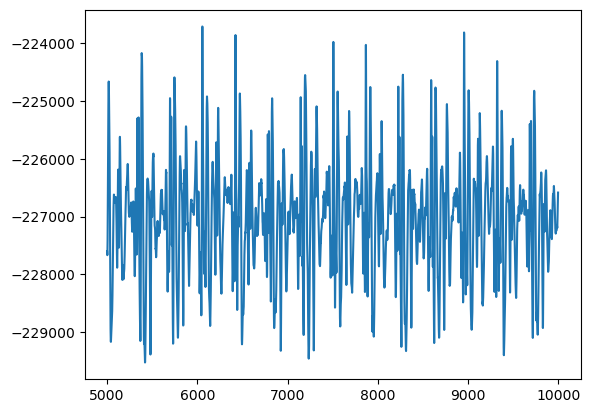

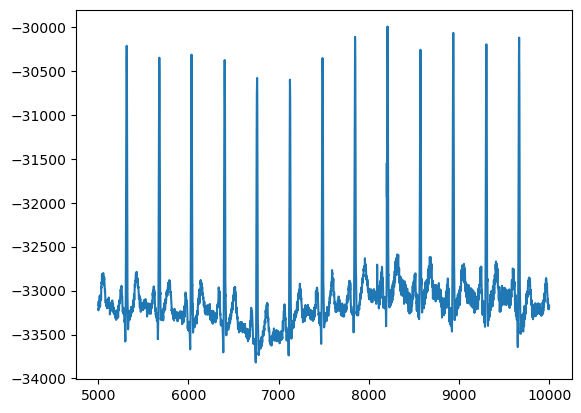

In [17]:
plt.plot(data_df["SCG_2_6_Z"][500*10:500*20]*-1)
plt.show()
plt.plot(data_df["ECG_II"][500*10:500*20])